In [1]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"F:\Programs\PycharmProjects\pythonProject\Malware-dataset.csv")
df['classification'] = df.classification.map({'benign':0, 'malware':1})
X = df.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = df["classification"]

x_train,x_test,y_train,y_test=tt(X,Y,test_size=0.9,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predGNB = gnb.predict(x_test)

print(confusion_matrix(y_test , predGNB))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predGNB)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predGNB)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predGNB))

[[17061 27955]
 [ 4222 40762]]

Accuracy : 0.6424777777777778

Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.38      0.51     45016
           1       0.59      0.91      0.72     44984

    accuracy                           0.64     90000
   macro avg       0.70      0.64      0.62     90000
weighted avg       0.70      0.64      0.62     90000

cohen kappa score
0.28508952518898634


In [3]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    predKNN = neigh.predict(x_test)
    
print(confusion_matrix(y_test , predKNN))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predKNN)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predKNN)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predKNN))
print("")

[[44778   238]
 [  432 44552]]

Accuracy : 0.9925555555555555

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     45016
           1       0.99      0.99      0.99     44984

    accuracy                           0.99     90000
   macro avg       0.99      0.99      0.99     90000
weighted avg       0.99      0.99      0.99     90000

cohen kappa score
0.9851110864065433



In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
predDT = clf.predict(x_test)

print(confusion_matrix(y_test , predDT))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predDT)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predDT)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predDT))
print("")

[[45014     2]
 [   20 44964]]

Accuracy : 0.9997555555555555

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45016
           1       1.00      1.00      1.00     44984

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

cohen kappa score
0.999511110979775



In [5]:
from sklearn.ensemble import RandomForestClassifier

rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(x_train,y_train)
predRF=rdF.predict(x_test)

print(confusion_matrix(y_test , predRF))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , predRF)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , predRF)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, predRF))
print("")

[[45016     0]
 [    0 44984]]

Accuracy : 1.0

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45016
           1       1.00      1.00      1.00     44984

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000

cohen kappa score
1.0



In [6]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predSVM = clf.predict(x_test)

print(confusion_matrix(y_test , y_predSVM))
print('')
print('Accuracy : {}'.format(accuracy_score(y_test , y_predSVM)))
print('')
print('Classification Report : \n{}'.format(classification_report(y_test , y_predSVM)))
print("cohen kappa score")
print(cohen_kappa_score(y_test, y_predSVM))

[[41987  3029]
 [ 3185 41799]]

Accuracy : 0.9309555555555555

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     45016
           1       0.93      0.93      0.93     44984

    accuracy                           0.93     90000
   macro avg       0.93      0.93      0.93     90000
weighted avg       0.93      0.93      0.93     90000

cohen kappa score
0.8619109234463512


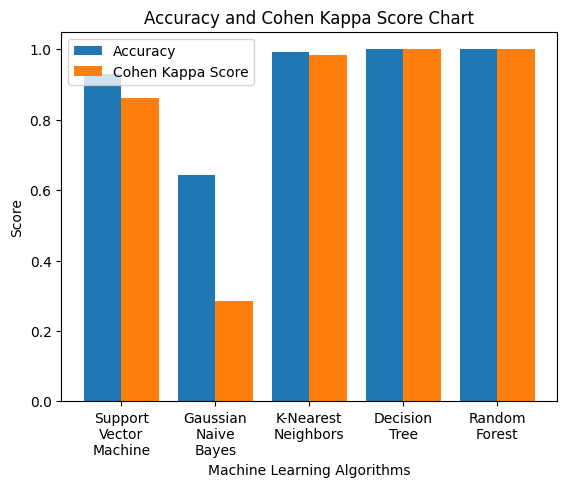

In [7]:
#Cohen Kappa Score of All algorithm
svmCKS = cohen_kappa_score(y_test, y_predSVM)
gbnCKS = cohen_kappa_score(y_test, predGNB)
knnCKS = cohen_kappa_score(y_test, predKNN)
dtCKS = cohen_kappa_score(y_test, predDT)
rfCKS = cohen_kappa_score(y_test, predRF)

#Accuracy Score of All algorithm
svmAC = accuracy_score(y_test, y_predSVM)
gbnAC = accuracy_score(y_test, predGNB)
knnAC = accuracy_score(y_test, predKNN)
dtAC = accuracy_score(y_test, predDT)
rfAC = accuracy_score(y_test, predRF)

A = [svmCKS, gbnCKS, knnCKS, dtCKS, rfCKS]
B = [svmAC, gbnAC, knnAC, dtAC, rfAC]

#For Ploting the Graph
import numpy as np
import matplotlib.pyplot as plt
Algorithm = ['Support\nVector\nMachine','Gaussian\nNaive\nBayes','K-Nearest\nNeighbors','Decision\nTree', 'Random\nForest']
X_axis = np.arange(len(Algorithm))
plt.bar(X_axis - 0.2, B, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, A, 0.4, label = 'Cohen Kappa Score')
plt.xticks(X_axis, Algorithm)
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Score")
plt.title("Accuracy and Cohen Kappa Score Chart")
plt.legend()
plt.show()